# Importing Libraries

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
path = r"/content/dset.csv"
df  = pd.read_csv(path)

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.tail()

,study_hours,student_marks
382,3.561,19.128
383,0.301,5.609
384,7.163,41.444
385,0.309,12.027
386,6.335,32.357


In [6]:
df.shape

(387, 2)

## Discover and visualize the data to gain insights

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    382 non-null    float64
 1   student_marks  387 non-null    float64
dtypes: float64(2)
memory usage: 6.2 KB


In [8]:
df.describe()

,study_hours,student_marks
count,382.000000,387.000000
mean,6.608545,66.017233
std,2.326743,26.202398
min,0.050000,5.609000
25%,5.390000,53.258500
50%,6.962000,76.830000
75%,8.417500,83.535000
max,9.910000,89.600000


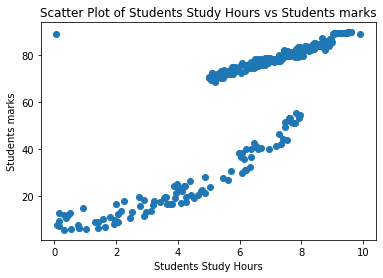

In [9]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

## Prepare the data for Machine Learning algorithms 

In [10]:
# Data Cleaning

In [11]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [12]:
df.mean()

study_hours       6.608545
student_marks    66.017233
dtype: float64

In [13]:
df2 = df.fillna(df.mean())

In [14]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [15]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.608545,78.68
3,5.670000,71.82
4,8.670000,84.19


In [16]:
# split dataset

In [17]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (387, 1)
shape of y =  (387, 1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (309, 1)
shape of y_train =  (309, 1)
shape of X_test =  (78, 1)
shape of y_test =  (78, 1)


# Select a model and train it

In [58]:
 # y = m * x + c
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.coef_

array([[9.52842314]])

In [22]:
lr.intercept_

array([2.97386968])

In [23]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [24]:
lr.predict([[5]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


50.62

In [25]:
y_pred  = lr.predict(X_test)
y_pred


array([[90.06365722],
       [48.51020389],
       [17.80962451],
       [78.72483368],
       [66.84289002],
       [30.68252418],
       [72.62664287],
       [59.3821347 ],
       [78.72483368],
       [85.96643527],
       [93.68445802],
       [24.52716283],
       [82.15506601],
       [66.43316782],
       [54.99906005],
       [89.01553068],
       [91.207068  ],
       [65.7661782 ],
       [74.2464748 ],
       [65.09918858],
       [67.48129437],
       [93.58917379],
       [75.86630674],
       [56.80946045],
       [69.48226323],
       [77.40038286],
       [62.03103633],
       [ 4.30784892],
       [81.67864485],
       [67.29072591],
       [85.49001411],
       [43.56495227],
       [89.3966676 ],
       [80.43994985],
       [21.5924085 ],
       [ 7.81430863],
       [18.49567098],
       [72.15022171],
       [58.61986084],
       [92.54104724],
       [52.71223849],
       [16.38036104],
       [55.7613339 ],
       [80.72580254],
       [68.05299976],
       [70

In [26]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,9.140,89.140,90.063657
1,4.779,22.701,48.510204
2,1.557,10.429,17.809625
3,7.950,82.030,78.724834
4,6.703,40.602,66.842890
...,...,...,...
73,0.771,7.892,10.320284
74,8.880,83.640,87.586267
75,7.620,79.530,75.580454
76,9.150,89.150,90.158941


## Fine-tune your model

In [27]:

lr.score(X_test,y_test)


0.8159074226676759

In [28]:
cutoff=0.7
y_pred_classes=np.zeros_like(y_pred)
y_pred_classes[y_pred>cutoff]=1
y_test_classes=np.zeros_like(y_pred)
y_test_classes[y_pred>cutoff]=1
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test_classes,y_pred_classes)
print(confusion_matrix)


[[78]]


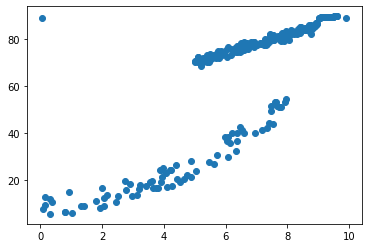

In [29]:
plt.scatter(X_train,y_train)

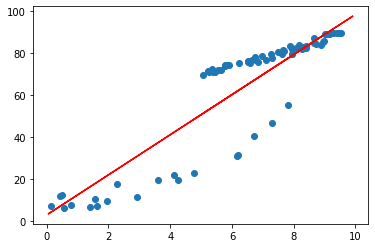

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")


In [31]:
import joblib
joblib.dump(lr,"college_mark_predictor.pkl")

['college_mark_predictor.pkl']

In [32]:
model=joblib.load("college_mark_predictor.pkl")

In [33]:
model.predict([[7]])[0][0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


69.67283169170535

In [34]:
#linear regression
pred4  = lr.predict(X_test).sum(axis=1)

In [35]:
#Random_Forest_Regressor
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=500,bootstrap=True,max_depth=50,max_features=0.25,min_samples_leaf=7,min_samples_split=10)
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)
print(pred1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[89.04603351 23.70151519 12.45007971 77.9058314  76.54211598 15.77388316
 73.88551426 66.57932679 77.9058314  84.5488919  89.4852012  12.24967142
 82.86299006 76.4830378  69.11838973 88.21986962 89.22680864 69.7445639
 66.30543842 67.05067093 76.36448704 89.4835621  65.19149641 64.2776132
 72.84421001 77.10964717 59.03864491 16.76391785 82.81336801 76.381393
 84.30827867 22.71736579 88.56916034 82.65125331 12.19161841 16.76391785
 12.28438801 73.84842    67.42166894 89.39962409 70.69398831 12.61527072
 65.91494475 82.72322133 76.32267951 73.00791985 67.39309029 70.90635206
 68.95921397 89.4426719  17.48239212 87.26999809 71.19850271 67.4501649
 77.9058314  89.20253568 59.12525232 59.13798425 87.04545897 88.91698157
 16.76391785 89.24496329 16.76391785 83.82261697 67.39309029 66.98390714
 74.01694356 88.9600867  83.84529836 84.30827867 77.00356186 82.34457062
 22.35661794 16.22022713 85.40952716 65.00895158 89.05200814 70.71418499]


In [36]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model2= GradientBoostingRegressor()
model2.fit(X_train,y_train)
pred2=model2.predict(X_test)
print(pred2)


[88.96029698 22.05855254 10.04257593 78.05263588 75.40805015 16.55785709
 76.02827335 70.77802876 78.05263588 84.27530343 89.10722767 12.61120688
 82.84871446 75.40805015 69.66774076 88.82272453 89.00731611 52.96833715
 66.5418645  69.33472786 75.40805015 89.10722767 58.8227082  67.28636454
 74.36693758 78.31465309 50.70335963  9.66454189 82.84871446 75.40805015
 84.12071886 22.16631746 88.882509   82.84871446 13.10334922  9.66454189
 10.04257593 76.02827335 70.77802876 89.0909982  70.02722226 10.04257593
 70.18326084 82.84871446 75.5505166  74.43793758 70.54747397 70.21407463
 70.02722226 89.10722767 17.92269087 86.44078372 70.21407463 76.40765627
 78.05263588 89.00731611 68.588907   50.70335963 86.44078372 88.91844482
  9.66454189 89.0289001   9.66454189 83.88163047 70.54747397 69.33472786
 76.02827335 88.91844482 83.88163047 84.12071886 78.31465309 81.85015775
 22.16631746  9.66454189 85.56868495 59.77696039 88.96029698 70.02722226]


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 **HYPERPARAMETER TUNING **


In [37]:
from sklearn.model_selection import GridSearchCV
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10] }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=4, subsample=0.2)

 The best score across ALL searched params:
 0.7824871151734969

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
#Bayesian Ridge
from sklearn.linear_model import BayesianRidge
model3=BayesianRidge()
model3.fit(X_train,y_train)
pred3=model3.predict(X_test)
print(pred3)

[90.0289563  48.53602818 17.88016612 78.70664847 66.8420116  30.73431561
 72.61734005 59.39212334 78.70664847 85.93770221 93.64448317 24.58791993
 82.13188445 66.43288619 55.01543291 88.98235642 91.17070163 65.76686808
 74.2348126  65.10084998 67.47948608 93.54933773 75.85228515 56.82319635
 69.4775404  77.3841268  62.03716668  4.39805671 81.65615723 67.28919519
 85.46197499 43.59797963 89.36293819 80.41926646 21.65744025  7.89940905
 18.56521332 72.14161283 58.63095979 92.50273785 52.73194226 16.45298446
 55.77659647 80.70470279 68.05035874 70.61928573 58.15523257 54.34941481
 51.3047606  92.78817418 37.23274943 88.60177464 53.87368759 76.32801237
 78.70664847 90.98041074 61.79930307 62.43677755 88.22119287 89.64837453
  7.09067277 91.26584707  8.29901991 82.893048   58.15523257 65.00570453
 72.36044735 89.93381086 83.08333889 85.46197499 78.04063036 80.03868468
 42.36108886 10.40173423 87.55517476 75.56684882 90.12410175 52.92223315]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#accuracy
from sklearn.metrics import r2_score
ensemble_prediction=(pred1*0.4+pred2*0.4
                     +pred3*0.1+pred4*0.1)
r2_score_ensemble=r2_score(y_test,ensemble_prediction)
print("Ensemble MoDEL Accuracy")
print(r2_score_ensemble)


Ensemble MoDEL Accuracy
0.895466030675074


In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
r2_score1=r2_score(y_test,pred1)
variance_score1=explained_variance_score(y_test,pred1)
mean_absolute_error1=mean_absolute_error(y_test,pred1)
mean_squared_log_error1=mean_squared_log_error(y_test,pred1)

r2_score2=r2_score(y_test,pred2)
variance_score2=explained_variance_score(y_test,pred2)
mean_absolute_error2=mean_absolute_error(y_test,pred2)
mean_squared_log_error2=mean_squared_log_error(y_test,pred2)

r2_score3=r2_score(y_test,pred3)
variance_score3=explained_variance_score(y_test,pred3)
mean_absolute_error3=mean_absolute_error(y_test,pred3)
mean_squared_log_error3=mean_squared_log_error(y_test,pred3)

r2_score4=r2_score(y_test,pred4)
variance_score4=explained_variance_score(y_test,pred4)
mean_absolute_error4=mean_absolute_error(y_test,pred4)
mean_squared_log_error4=mean_squared_log_error(y_test,pred4)


In [41]:
#printing the values
print("Ranom Forest Regressor Report")
print("-> R2 Score:",r2_score1)
print("->mean absolute error:",mean_absolute_error1)
print("->variance_score:",variance_score1)
print("-> mean squared log error:",mean_squared_log_error1)

#gradient Boosting

print("\n")
print("Gradient Boosting Report")
print("-> R2 Score:",r2_score2)
print("->mean absolute error:",mean_absolute_error2)
print("->variance_score:",variance_score2)
print("-> mean squared log error:",mean_squared_log_error2)

#Bayesian Ridge
print("\n")
print("Bayesian Ridge Report")
print("-> R2 Score:",r2_score3)
print("->mean absolute error:",mean_absolute_error3)
print("->variance_score:",variance_score3)
print("-> mean squared log error:",mean_squared_log_error3)

#linear regressor
print("\n")
print("Linear Regression Report")
print("-> R2 Score:",r2_score4)
print("->mean absolute error:",mean_absolute_error4)
print("->variance_score:",variance_score4)
print("-> mean squared log error:",mean_squared_log_error4)

Ranom Forest Regressor Report
-> R2 Score: 0.8969636583812532
->mean absolute error: 5.181152184684641
->variance_score: 0.8970639329275524
-> mean squared log error: 0.06055997246944537


Gradient Boosting Report
-> R2 Score: 0.8851455670055234
->mean absolute error: 4.8197961791467545
->variance_score: 0.8852157300620376
-> mean squared log error: 0.03855770404561922


Bayesian Ridge Report
-> R2 Score: 0.815825684186779
->mean absolute error: 8.888554638743011
->variance_score: 0.8159972494994563
-> mean squared log error: 0.10787939404705035


Linear Regression Report
-> R2 Score: 0.8159074226676759
->mean absolute error: 8.889062220544739
->variance_score: 0.8160810014668257
-> mean squared log error: 0.10784519850935857


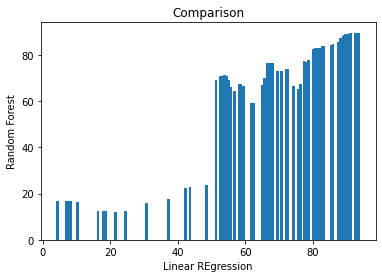

In [42]:
plt.bar(pred4,pred1)
plt.title('Comparison')
plt.xlabel('Linear REgression')
plt.ylabel('Random Forest')
plt.show()

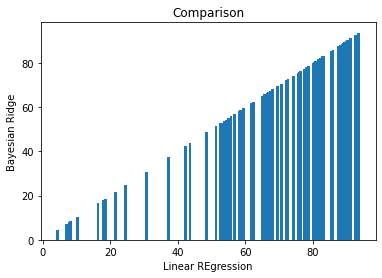

In [43]:
plt.bar(pred4,pred3)
plt.title('Comparison')
plt.xlabel('Linear REgression')
plt.ylabel('Bayesian Ridge')
plt.show()

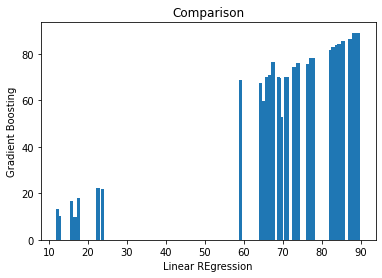

In [44]:
plt.bar(pred1,pred2)
plt.title('Comparison')
plt.xlabel('Linear REgression')
plt.ylabel('Gradient Boosting')
plt.show()

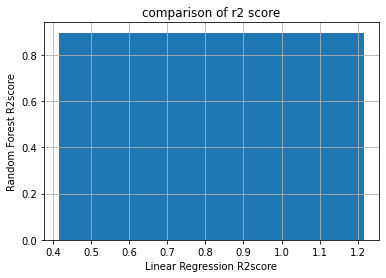

In [45]:
a=r2_score1
b=r2_score4
plt.title("comparison of r2 score")
plt.bar(b,a)
plt.xlabel("Linear Regression R2score")
plt.ylabel("Random Forest R2score")
plt.grid()


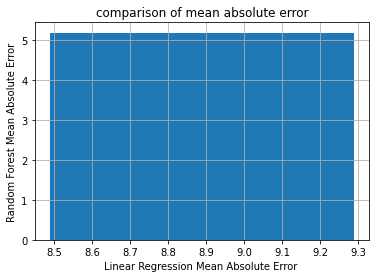

In [46]:
c=mean_absolute_error1
d=mean_absolute_error4
plt.title("comparison of mean absolute error")
plt.bar(d,c)
plt.xlabel("Linear Regression Mean Absolute Error ")
plt.ylabel("Random Forest Mean Absolute Error")
plt.grid()
plt.show()

**XGBRegressor**


In [47]:
import xgboost
print(xgboost.__version__)

0.90


In [48]:
from xgboost.sklearn import XGBRegressor
from pandas import read_csv
from numpy import asarray

In [49]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.608545,78.68
3,5.670000,71.82
4,8.670000,84.19


In [51]:
from sklearn.model_selection import RepeatedKFold

dataframe=read_csv("/content/dset.csv",header=0)
data=dataframe.values
#split dataset 
A, b=data[:, :-1],data[:, -1]
tech=XGBRegressor()
#define model evaluation method
cv= RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)


In [52]:
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())


(387, 2)
   study_hours  student_marks
0         6.83          78.50
1         6.56          76.74
2          NaN          78.68
3         5.67          71.82
4         8.67          84.19


In [53]:
#fitting model
tech.fit(A, b)


[04:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [54]:
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b)
tech= XGBRegressor()
tech.fit(A_train,b_train)
pred5=tech.predict(A_test)
print(pred5)

[04:01:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12.418741 82.826706 76.71983  84.639305 89.02195  89.02195  72.02018
 88.9249   72.0154    9.958003 89.02195  71.61751  88.9249   83.25523
 70.02389  83.25523   8.865538 72.0154   89.02195  34.48013  84.10002
 84.65437  82.30389  84.504684 70.276276 70.391235 88.81256  74.03107
 78.67732  12.418741 89.02195  18.320934 84.17231  68.178604 89.02195
 71.15669  88.85453  21.858252 89.02195  88.987976 74.03107  83.25523
 88.81256  85.91288  89.02195  22.483068 71.72464  88.96712  73.61937
 70.02389  71.15669  74.437096 89.02195  84.504684 71.72464  17.814373
 89.02195  72.02018  73.61937  89.02195  68.178604 71.15669  74.03107
 70.02389   8.865538 10.073894 89.02195   9.491025 21.858252 45.10267
 70.34099  68.49199  85.904205 82.84858  68.178604 89.02195  68.49199
 89.02195  83.25523  78.922615 70.35848  83.25523  51.007587  8.865538
 88.96712  57.128674 18.320934 

In [55]:
# define new data
row = [8]
new_data = asarray([row])
# make a prediction
yhat = tech.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 81.811


In [56]:
r2_score5=r2_score(b_test,pred5)
variance_score5=explained_variance_score(b_test,pred5)
mean_absolute_error5=mean_absolute_error(b_test,pred5)
mean_squared_log_error5=mean_squared_log_error(b_test,pred5)

In [57]:
#printing the values
print("EXTREME GRADIENT BOOSTING  Regressor Report")
print("-> R2 Score:",r2_score5)
print("->mean absolute error:",mean_absolute_error5)
print("->variance_score:",variance_score5)
print("-> mean squared log error:",mean_squared_log_error5)

EXTREME GRADIENT BOOSTING  Regressor Report
-> R2 Score: 0.7670594822220403
->mean absolute error: 5.758534941525803
->variance_score: 0.7703124288956388
-> mean squared log error: 0.08556883709050551
